<a href="https://colab.research.google.com/github/YashVSharma/ML-Tasks/blob/master/ANN_BankProblem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
bank=pd.read_csv("http://13.234.66.67/summer19/datasets/bank.csv")



array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

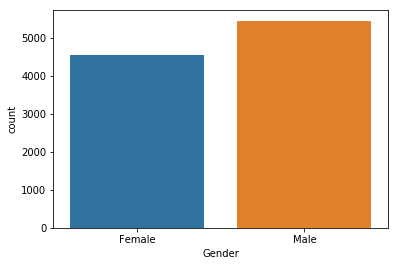

In [35]:
#countplot by seaborn
sb.countplot(bank['Gender'])
features=bank.iloc[:,3:13].values
label=bank.iloc[:,13].values
#to convert string data into numeric --- label encoding
from sklearn.preprocessing import LabelEncoder
countenc=LabelEncoder()
features[:,1]=countenc.fit_transform(features[:,1])
features[:,2]=countenc.fit_transform(features[:,2])
features

In [0]:
#creatin dummy variables using yash vardhan sharma
from sklearn.preprocessing import OneHotEncoder
counthot=OneHotEncoder(categorical_features=[1])

In [37]:
#fit and transform 
features=counthot.fit_transform(features).toarray()
features=features[:,1:]
features.shape

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


(10000, 11)

In [0]:
#training and testing
from sklearn.model_selection import train_test_split
X,x,Y,y=train_test_split(features,label,test_size=0.2)

In [0]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
#testing data tramnsform
x=sc.transform(x)

In [40]:
x.shape

(2000, 11)

In [41]:
X.shape

(8000, 11)

In [42]:
#NOW WE CAN CREATE ANN MODEL
import keras #this is the framework of using tensorflow in background

Using TensorFlow backend.


In [0]:
#keras  ANN model library import
from keras.models import Sequential

In [45]:
#filling data in  each layer-
from keras.layers import Dense
#this will give the method to decide activation layer function and number of nodes in each layer 
#including input,hidden,output layer


#now we can design model
model=Sequential()

W0708 10:12:12.406021 139672381179776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [46]:
model.add(Dense(6,input_shape=(11,),activation='relu'))
#relu -means rectifier activation function


W0708 10:20:41.500577 139672381179776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 10:20:41.515571 139672381179776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
#adiinfg one more hidden layer
model.add(Dense(6,activation='relu')) #we dont have to assign no of inputs after frist or the input layer

In [0]:
#final layer adding
model.add(Dense(1,activation='sigmoid'))

In [49]:
#compile 
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) #optimizer -- weight adjust method -- stochitis  gd adam

W0708 10:33:56.650867 139672381179776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0708 10:33:56.680297 139672381179776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0708 10:33:56.687011 139672381179776 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [53]:
#training data fit
model.model.fit(X,Y,batch_size=30,epochs=100)

Epoch 1/100
3810/8000 [=============>................] - ETA: 0s - loss: 0.4431 - acc: 0.7997

/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py:110: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


8000/8000 [==============================] - 0s 41us/step - loss: 0.4336 - acc: 0.8067
Epoch 2/100
8000/8000 [==============================] - 0s 40us/step - loss: 0.4245 - acc: 0.8101
Epoch 3/100
8000/8000 [==============================] - 0s 39us/step - loss: 0.4177 - acc: 0.8145
Epoch 4/100
8000/8000 [==============================] - 0s 42us/step - loss: 0.4119 - acc: 0.8176
Epoch 5/100
8000/8000 [==============================] - 0s 41us/step - loss: 0.4068 - acc: 0.8229
Epoch 6/100
8000/8000 [==============================] - 0s 41us/step - loss: 0.4016 - acc: 0.8241
Epoch 7/100
8000/8000 [==============================] - 0s 41us/step - loss: 0.3964 - acc: 0.8240
Epoch 8/100
8000/8000 [==============================] - 0s 40us/step - loss: 0.3900 - acc: 0.8272
Epoch 9/100
8000/8000 [==============================] - 0s 41us/step - loss: 0.3823 - acc: 0.8371
Epoch 10/100
8000/8000 [==============================] - 0s 41us/step - loss: 0.3727 - acc: 0.8439
Epoch 11/100
8000/800

In [54]:
model.predict(x) #now predicting test data

array([[0.08411127],
       [0.42400396],
       [0.08428922],
       ...,
       [0.01084653],
       [0.06589255],
       [0.25263137]], dtype=float32)